【说明】本notebook文件将基于《Hands-On Machine Learning withScikit-Learn and TensorFlow》（by Aurélien Géron，O’Reilly）进行代码实践。 



#  加州房产价格数据集
- 项目目标：构建一个预测街区房价中位数的模型，用于企业投资决策的子分。
- 项目拆解：有监督、多变量回归问题
- 评价指标：均方根误差（均方根误差/RMSE比平均绝对误差/MAE对异常值更敏感）

In [108]:
import os
import tarfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 分层抽样：StratifiedShuffleSplit

%matplotlib inline

# get data
def GetData(path,file_name):
    file = file_name + '.tgz'
    url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'+ path + '/'+ file
    r = requests.get(url)
    file_save_dir = 'data/' + file
    with open(file_save_dir,'wb') as code:
        code.write(r.content)
# unzip .tgz
def ExtractTgz(file_name):
    file_dir = 'data/'+ file_name + '.tgz'
    tarObject = tarfile.open(file_dir,'r:gz')
    for info in tarObject:
        tarObject.extract(info.name,r'data/')
    tarObject.close()
    os.remove(file_dir)
# describe
def DescData(data):
    sample = data.head()
    data_type = data.dtypes
    data_type_obj = list(data.dtypes[data.dtypes == 'object'].index)
    print('data sample:')
    print(sample)
    print('\ndata type:')
    print(data_type)
    print('\ndistribution of category features:')
    for i in data_type_obj:
        print('\n%s:' % (i))
        print(data[i].value_counts())
    print('\ndistribution of numerical features')
    print(data.describe().T)
    data.hist(bins=20,figsize=(20,20))
# train & test
def SpliData(data,drop_col):
    return train_test_split(data.drop(drop_col, axis=1),
                             data.median_house_value,
                             test_size=0.3,
                             random_state=11)

# data preprocess
# modeling
# predict
# estimate

data sample:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

data type:
longitude             float64
latitude            

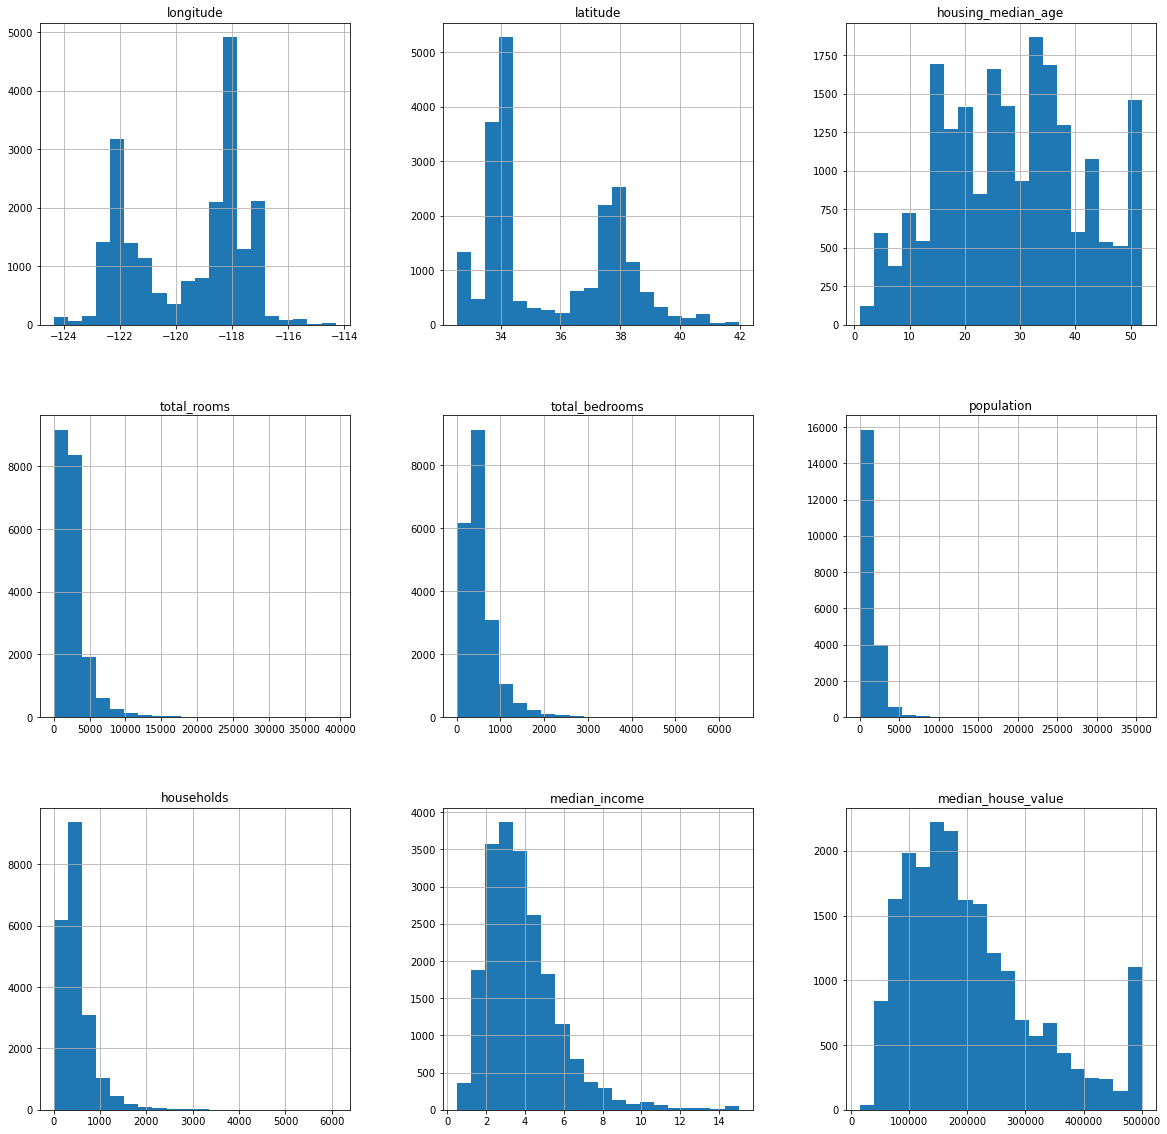

In [99]:
GetData('datasets/housing','housing')
ExtractTgz('housing')
data = pd.read_csv('data/housing.csv')
DescData(data)

通过对变量的观察，有如下信息：
1. 部分数据存在缩放的可能性，如‘housing_median_age’ & median_house_value 上限至有较为异常的激增，实际生产环境中需要与业务核实有效性，以评估重新采集信息、剔除建模等
2. 部分数据偏态严重，非正态分布，影响部分模型建模效果
3. 数据度量维度的差异
4. 非数值型变量的处理

In [109]:
x_train,x_test,y_train,y_test = SpliData(data,['median_house_value'])

## 数据探索

In [115]:
temp = x_train.copy()

建立数据的副本，可以隔离数据探索过程中对数据的修改。
- 地理数据可视化

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

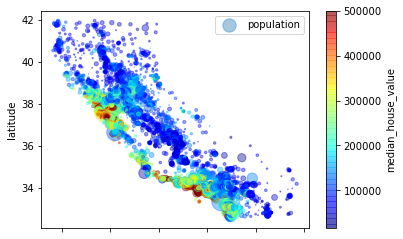

In [122]:
data.plot(kind="scatter",
          x="longitude",
          y="latitude",
          alpha=0.4,
          s=data["population"]/100,
          label="population",
          c="median_house_value",
          cmap=plt.get_cmap("jet"),
          colorbar=True)

In [123]:
temp.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.925598,-0.108492,0.042357,0.065131,0.095246,0.049728,-0.010625
latitude,-0.925598,1.000000,0.014110,-0.035885,-0.064681,-0.106636,-0.067997,-0.082743
housing_median_age,-0.108492,0.014110,1.000000,-0.358313,-0.318455,-0.292953,-0.300557,-0.122425
total_rooms,0.042357,-0.035885,-0.358313,1.000000,0.931836,0.853595,0.918084,0.201825
total_bedrooms,0.065131,-0.064681,-0.318455,0.931836,1.000000,0.874847,0.979471,-0.001603
population,0.095246,-0.106636,-0.292953,0.853595,0.874847,1.000000,0.904421,0.008496
households,0.049728,-0.067997,-0.300557,0.918084,0.979471,0.904421,1.000000,0.017999
median_income,-0.010625,-0.082743,-0.122425,0.201825,-0.001603,0.008496,0.017999,1.000000


## 2.1 二分类问题

随机森林

## 2.2 多分类问题


In [ ]:
>>> from sklearn.preprocessing import StandardScaler
>>> scaler = StandardScaler()
>>> X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
>>> cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

## 误差分析
3 和 5 之间的主要差异是连接顶部的线和底部的线的细线的位置。如果你画一个 3，连接处稍微向左偏移，分类器很可能将它分类成 5。反之亦然。换一个说法，这个分类器对于图片的位移和旋转相当敏感。所以，减轻 3/5 混淆的一个方法是对图片进行预处理，确保它们都很好地中心化和不过度旋转。这同样很可能帮助减轻其他类型的错误。

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## 2.3 多标签分类

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro") # 标签的权重：average="weighted"

## 2.4 多输出分类
它是多标签分类的简单泛化，在这里每一个标签可以是多类别的（比如说，它可以有多于两个可能值）。

为了说明这点，我们建立一个系统，它可以去除图片当中的噪音。它将一张混有噪音的图片作为输入，期待它输出一张干净的数字图片

In [ ]:
noise = rnd.randint(0, 100, (len(X_train), 784))
noise = rnd.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)